- Understand problem statement
- Recognise task
- Cleaning, preprocessing, feature engineering, EDA
- Train ML models
- Tune and evaluate the performance
- Choose the best model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\windows 10\Desktop\Machine learning\drug200 (1).csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [5]:
print('BP :', data['BP'].unique())
print('Cholesterol : ', data['Cholesterol'].unique())
print(' Drug :', data['Drug'].unique())

BP : ['HIGH' 'LOW' 'NORMAL']
Cholesterol :  ['HIGH' 'NORMAL']
 Drug : ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [6]:
# Check for duplicate values
data.duplicated().sum()

0

In [7]:
# Check for missing values
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

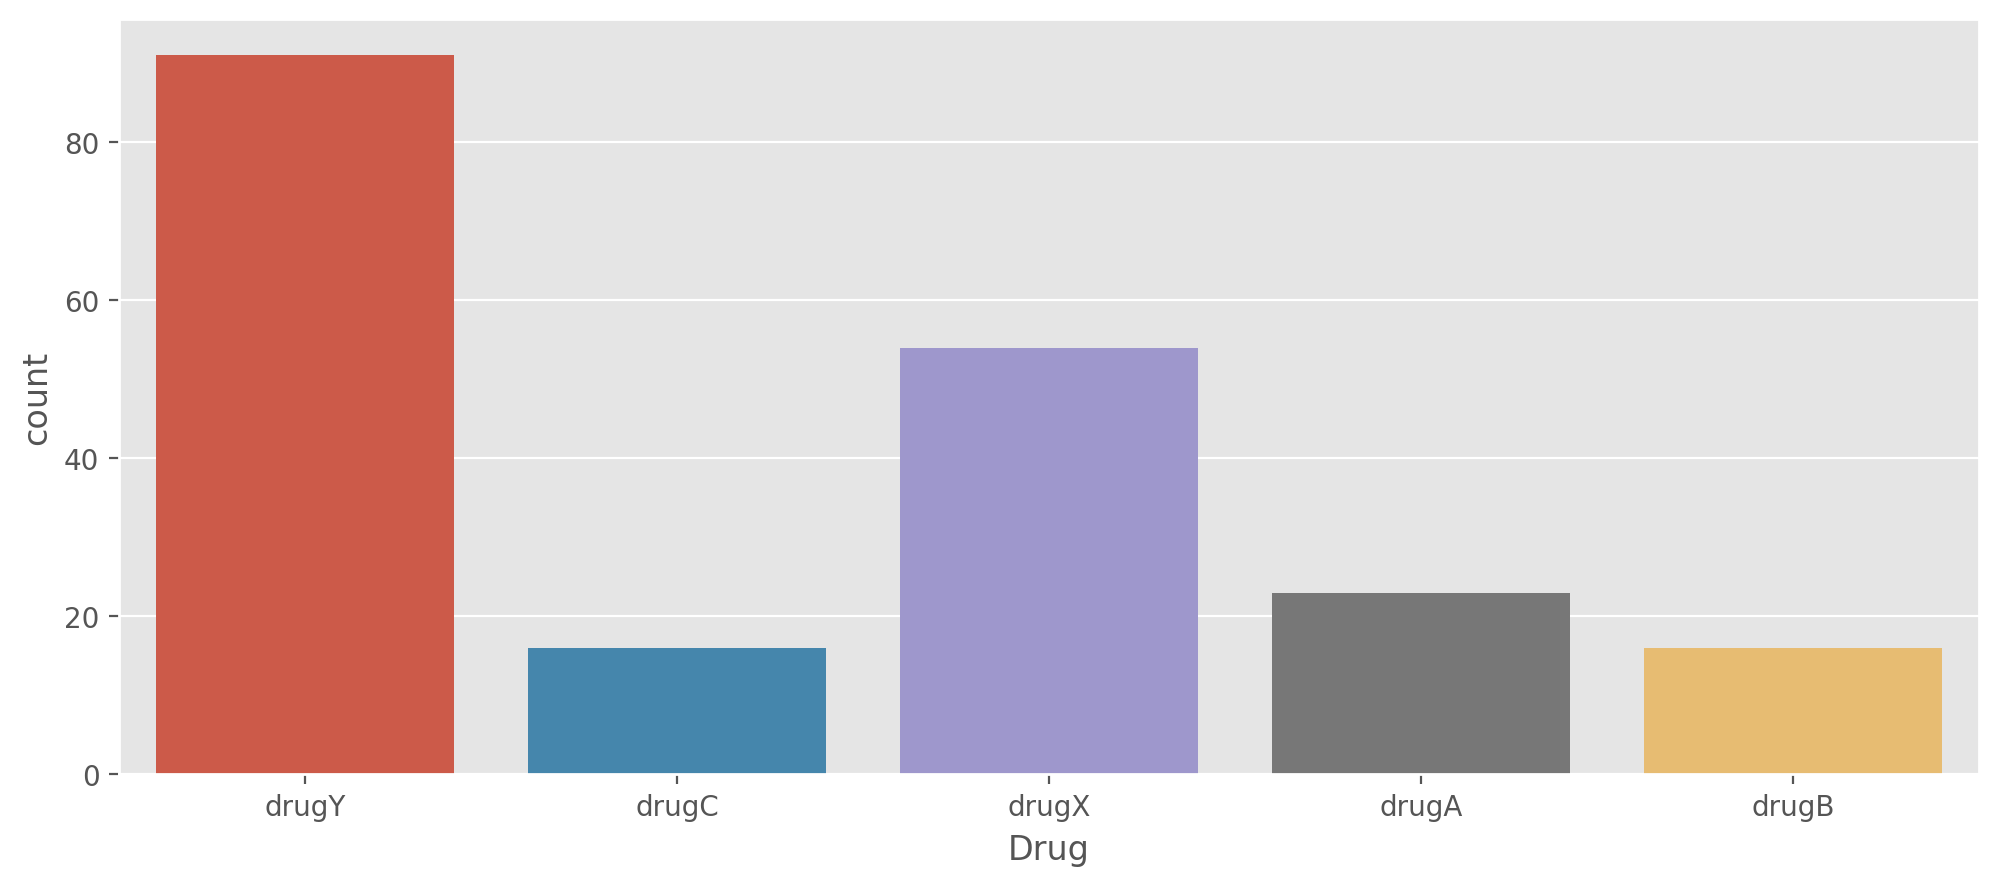

In [8]:
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(x='Drug', data=data)

In [9]:
data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='Age'>

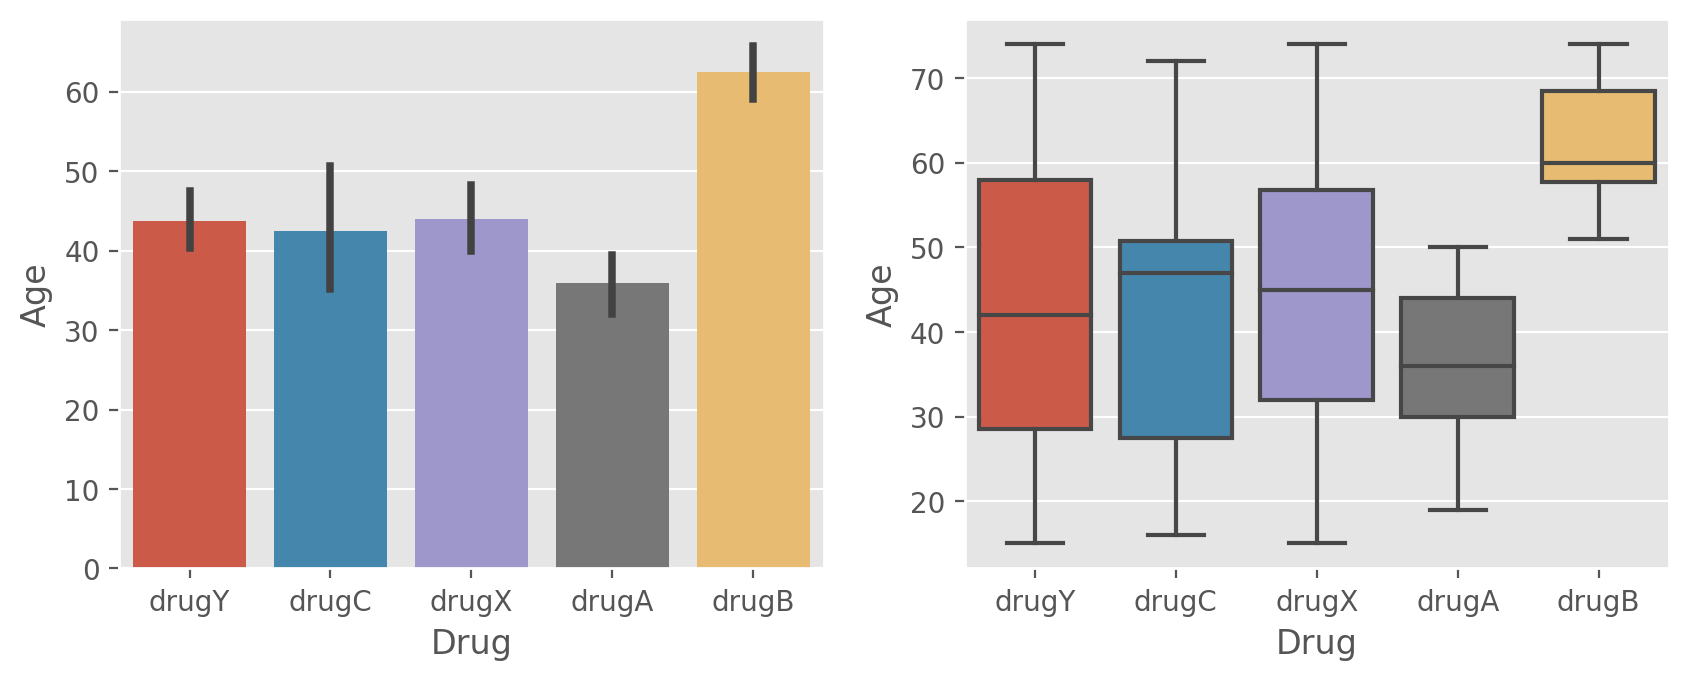

In [10]:
plt.figure(figsize=(10,8), dpi=200)
plt.subplot(2,2,1)
sns.barplot(y='Age', x='Drug', data=data)
plt.subplot(2,2,2)
sns.boxplot(y='Age', x='Drug', data=data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

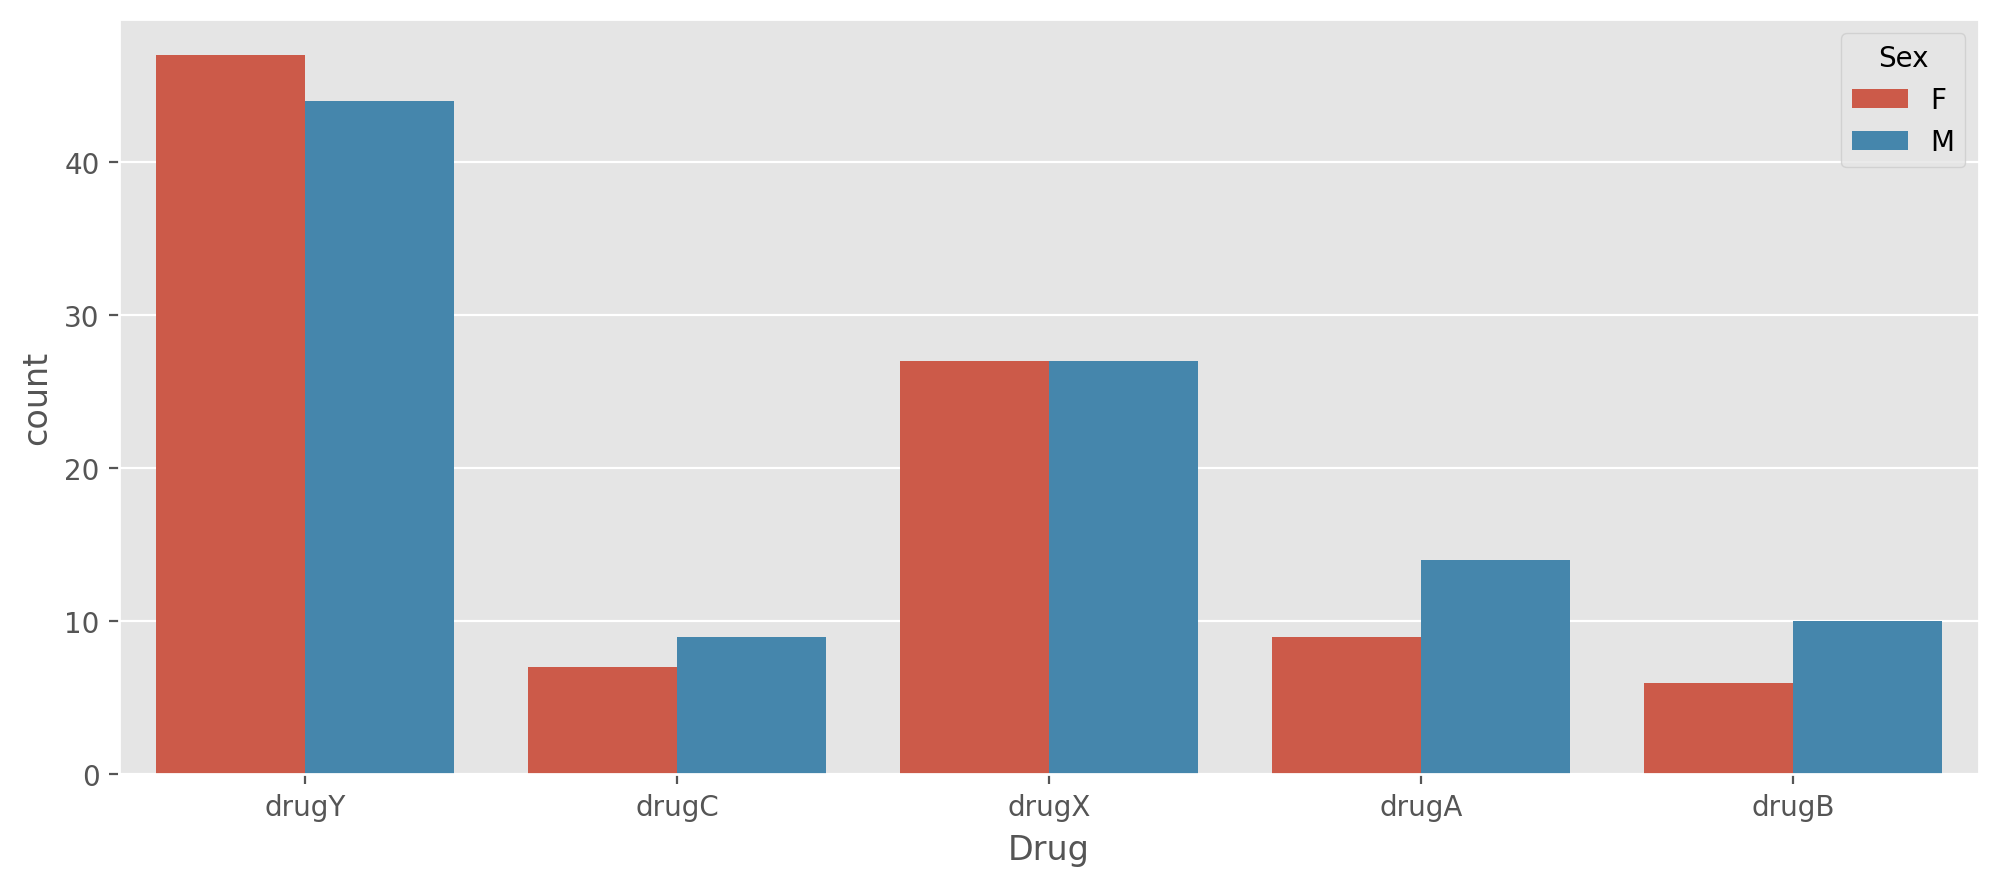

In [11]:
# for 2 categorcal data, we use countplot with hue
# so here does sex impact on drug ?

plt.figure(figsize=(12,5), dpi=200)
sns.countplot(x = 'Drug', hue='Sex', data=data)

# It's not impacting that much

<AxesSubplot:xlabel='Drug', ylabel='count'>

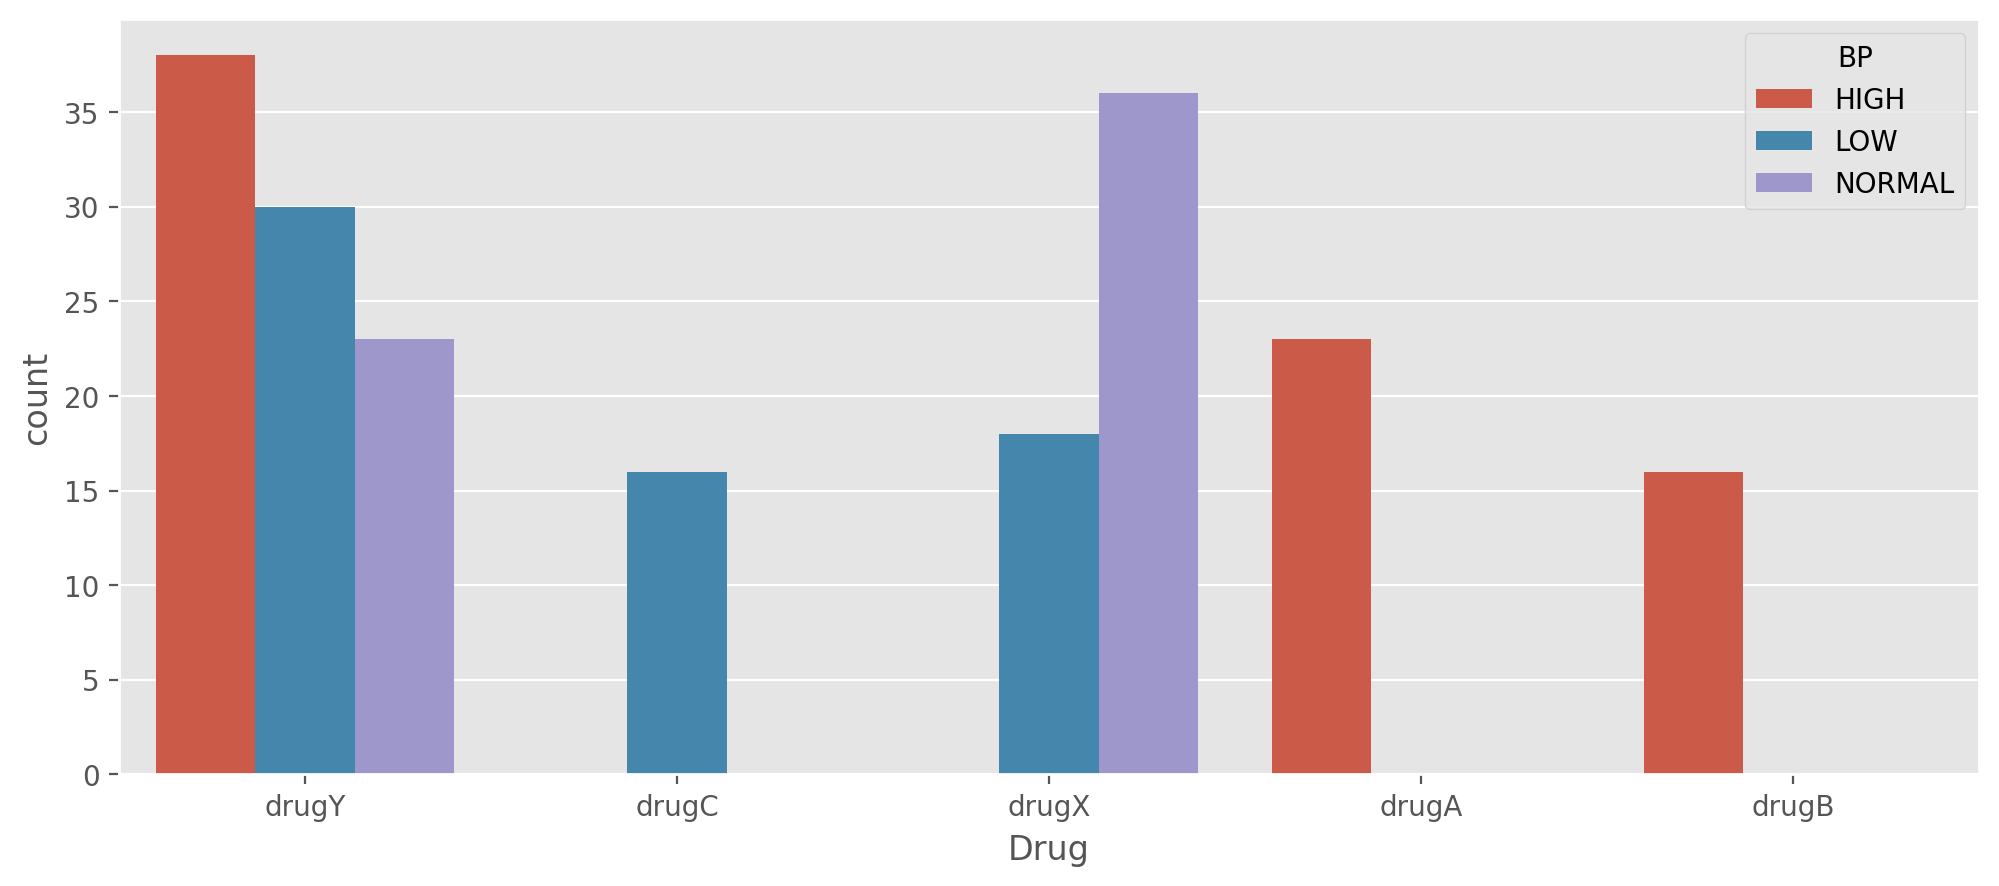

In [12]:
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(x = 'Drug', hue='BP', data=data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

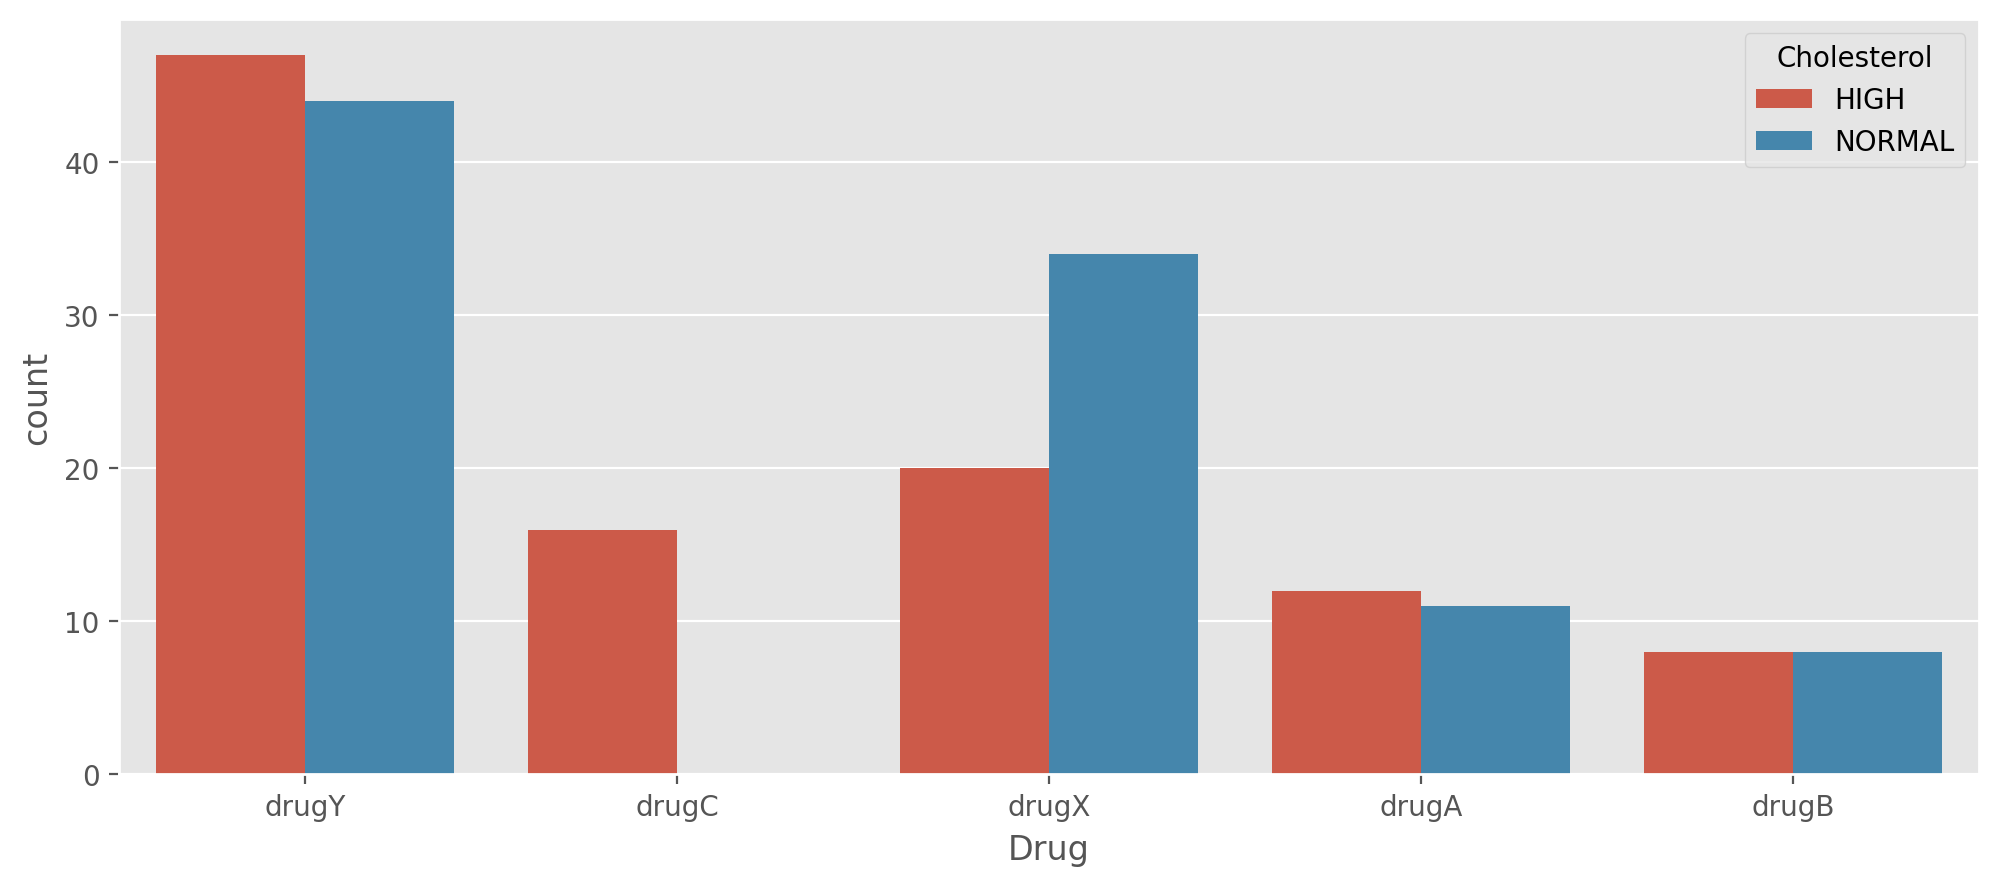

In [13]:
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(x = 'Drug', hue='Cholesterol', data=data)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

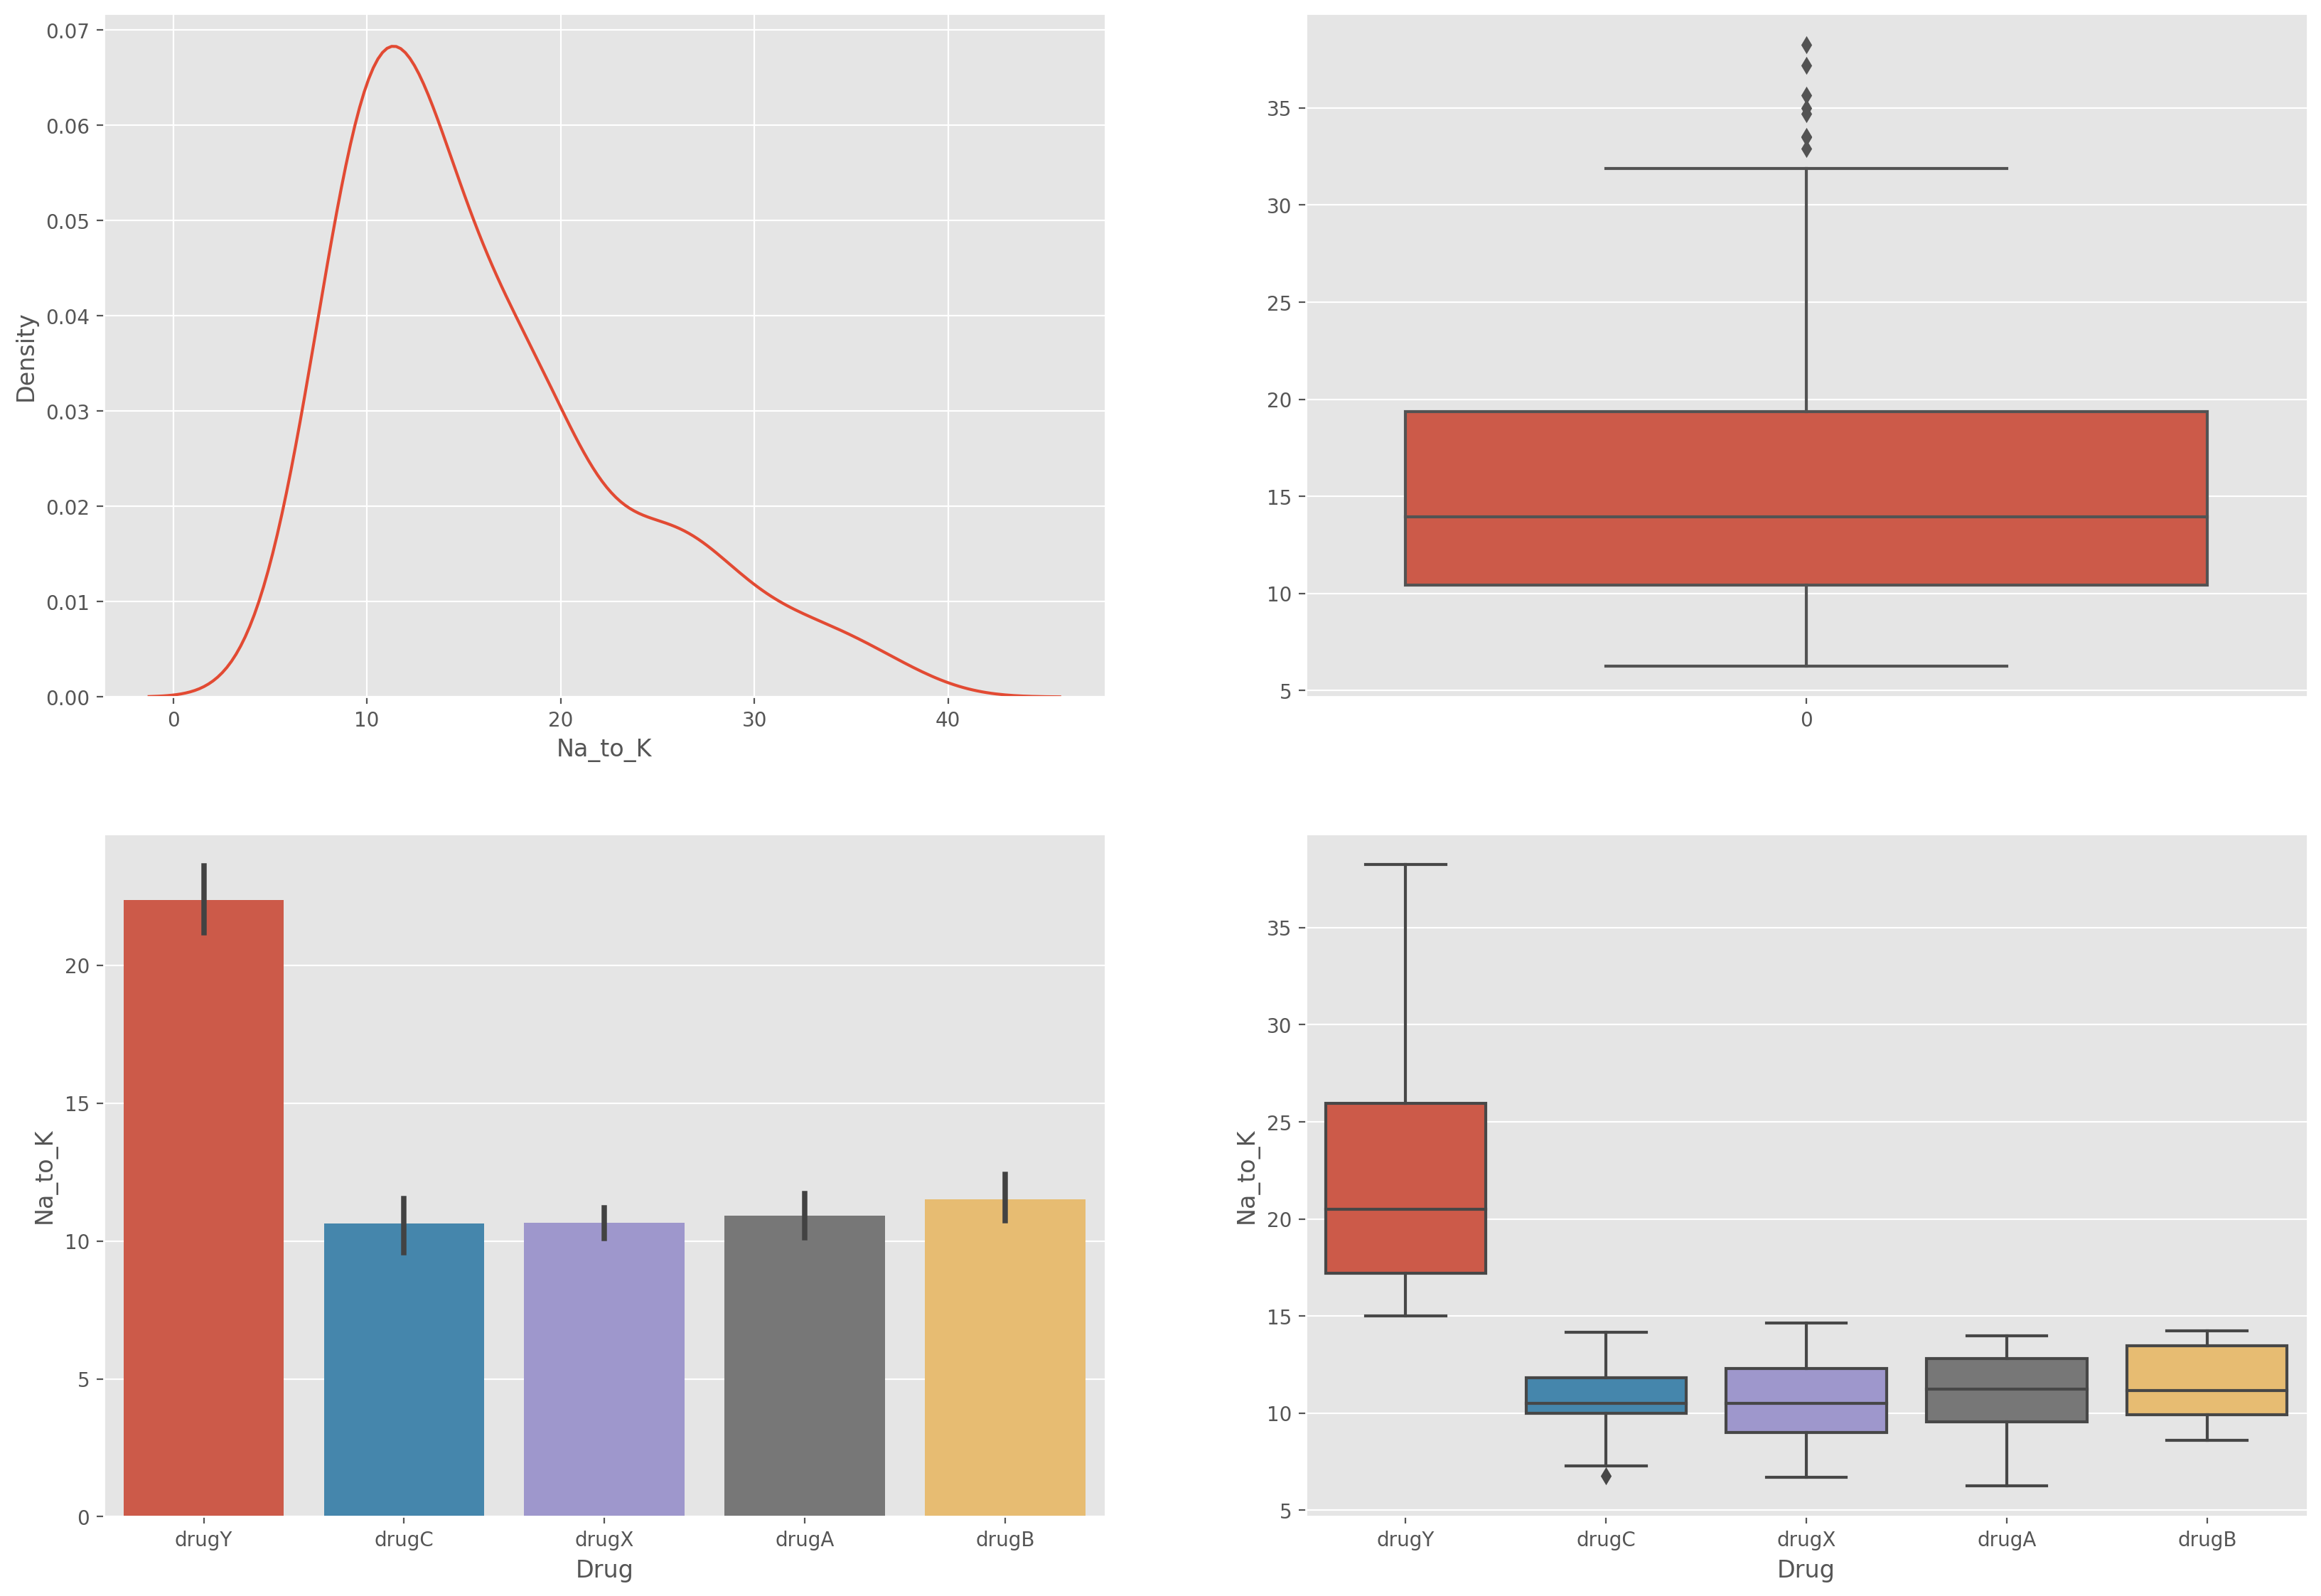

In [14]:
# Na_to_k
plt.figure(figsize=(20,14), dpi=200)
plt.subplot(2,2,1)
sns.distplot(data['Na_to_K'], hist = False)
plt.subplot(2,2,2)
sns.boxplot(data['Na_to_K'])
plt.subplot(2,2,3)
sns.barplot(y='Na_to_K', x='Drug', data=data)
plt.subplot(2,2,4)
sns.boxplot(y='Na_to_K', x='Drug', data=data)

In [15]:
cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = data[cols]
Y = data[['Drug']]

print('Independent feature :', X.shape)
print('Dependent featuer :', Y.shape)

Independent feature : (200, 5)
Dependent featuer : (200, 1)


In [16]:
# Encoding with map function

X.Sex = X.Sex.map({'M' : 0, 'F' : 1})
X.BP = X.BP.map({'LOW':0, 'NORMAL':1, 'HIGH':2})
X.Cholesterol = X.Cholesterol.map({'NORMAL' : 0, 'HIGH':1})

X.head(10)


# Now categorical numbers are converted into numerical

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,2,1,25.355
1,47,0,0,1,13.093
2,47,0,0,1,10.114
3,28,1,1,1,7.798
4,61,1,0,1,18.043
5,22,1,1,1,8.607
6,49,1,1,1,16.275
7,41,0,0,1,11.037
8,60,0,1,1,15.171
9,43,0,0,0,19.368


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

# random_state (seed): splitting will be random but it will be same results(features)

In [18]:
print('Training data shape       : ',x_train.shape)
print('Training labels shape     : ',y_train.shape)
print('Testing shape             : ', x_test.shape)
print('Testing labels shape      : ',y_test.shape)

Training data shape       :  (160, 5)
Training labels shape     :  (160, 1)
Testing shape             :  (40, 5)
Testing labels shape      :  (40, 1)


### Training our model


In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Evaluation
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Set accuracy    :', accuracy_score(y_train, pred_train))
print('Testing  Set accuracy    :', accuracy_score(y_test, pred_test))

Training Set accuracy    : 0.83125
Testing  Set accuracy    : 0.825


### Trying a decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [22]:
# Evaluation
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Set accuracy    :', accuracy_score(y_train, pred_train))
print('Testing  Set accuracy    :', accuracy_score(y_test, pred_test))

Training Set accuracy    : 1.0
Testing  Set accuracy    : 1.0


In [23]:
# decision tree giving better results